***Objectives***

Upon initial inspection of the data, we can start thinking of some questions about it that we would want to answer.

1. What is the overall sales trend?

2. Which are the Top 10 products by sales?

3. Which are the Most Selling Products?

4. Which is the most preferred Shipping Mode?

5. Which are the Most Profitable Category and Sub-Category?

6. Who are the customers that attracts the most sales ?

7. In what year did we have the most and least sales and what item was mostly sold in each year?

8. What day of the week did most people make orders?

9. Is there a trend in purchase per month?

10. What country do most customers come from ?

Import libraries

In [1]:
import pandas as pd
import numpy as np 
import chart_studio.plotly as py
import cufflinks as cf
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go  
fig = go.Figure()
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()



import os 

Load dataset

In [2]:
os.chdir('/Users/tomisin/Library/docs/com~apple~CloudDocs/c.Documents/Data_analysis/My_workspace/Miniprojects/Product_sales_analysis')
df = pd.read_csv('/Users/tomisin/Library/docs/com~apple~CloudDocs/c.Documents/Data_analysis/My_workspace/Miniprojects/Product_sales_analysis/superstore_sales.csv')

In [3]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

eyeball and inspect data for any missing values, duplicate rows or columns

In [4]:

print(df.info())

print('************')
print('************')

#for non-null/missing values
print(df.isna().sum().tolist())

print('************')
print('************')

print(df.describe())

print('************')
print('************')

#for duplicate values in the dataset
x = df.columns.duplicated().tolist()
y = df.duplicated().tolist()
result1 = []
result2 = []
if True in x and y:
    result1.append(x)
    result2.append(y)
    print('There are duplicate values in this dataset')
else:
    print('There are no duplicate values in this dataset')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  float64
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

Add new columns 'month' and 'weekday' to your dataset

In [5]:
from datetime import date

df['order_date']=pd.to_datetime(df['order_date'])

df['month']=df['order_date'].dt.month
df['weekday']=df['order_date'].dt.weekday

df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month,weekday
0,AG-2011-2040,2011-01-01,06.01.11,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408.30,2,0.0,106.140,35.46,Medium,2011,1,5
1,IN-2011-47883,2011-01-01,08.01.11,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120.37,3,0.1,36.036,9.72,Medium,2011,1,5
2,HU-2011-1220,2011-01-01,05.01.11,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,"Tenex Box, Single Width",66.12,4,0.0,29.640,8.17,High,2011,1,5
3,IT-2011-3647632,2011-01-01,05.01.11,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,"Enermax Note Cards, Premium",44.87,3,0.5,-26.055,4.82,High,2011,1,5
4,IN-2011-47883,2011-01-01,08.01.11,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Eldon Light Bulb, Duo Pack",113.67,5,0.1,37.770,4.70,Medium,2011,1,5


In [25]:
df['profit'].sum()

1469034.8212799998

EXPLORATORY DATA ANALYSIS (EDA)

1. What is the overall profit and sales trend?

*****Sales and profit progressively increases from 2011 till 2014. This is a great achievement for the store and overall, the company is growing. It also means that company is making profit*****

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


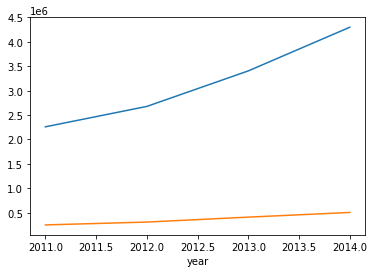

In [34]:
print(df.groupby('year')[('sales')].sum().plot.line())
print(df.groupby('year')[('profit')].sum().plot.line())
x = cost


<AxesSubplot:xlabel='year'>

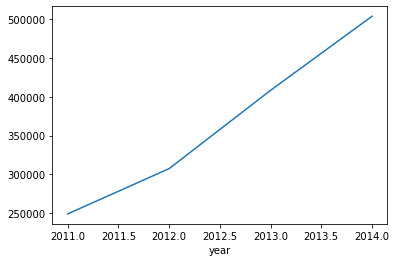

In [32]:
df.groupby('year')[('profit')].sum().plot.line()


In [26]:
sales_year.head()

,sales
year,
2011,2259451.64
2012,2677439.91
2013,3405748.03
2014,4299867.67


2. What are the top 10 product by sales?

***Based on sales from 2011-2014, smartphones generate the highest sales, Apple bringing in the most sales.***

In [36]:
products_df = df.groupby(['product_name','category', 'sub_category'])[['sales']].sum().sort_values(by='sales', ascending=False).head(10)
products_df

,,,sales
product_name,category,sub_category,
"Apple Smart Phone, Full Size",Technology,Phones,86935.79
"Cisco Smart Phone, Full Size",Technology,Phones,76441.53
"Motorola Smart Phone, Full Size",Technology,Phones,73156.33
"Nokia Smart Phone, Full Size",Technology,Phones,71904.56
Canon imageCLASS 2200 Advanced Copier,Technology,Copiers,61599.83
"Hon Executive Leather Armchair, Adjustable",Furniture,Chairs,58193.52
"Office Star Executive Leather Armchair, Adjustable",Furniture,Chairs,50661.68
"Harbour Creations Executive Leather Armchair, Adjustable",Furniture,Chairs,50121.52
"Samsung Smart Phone, Cordless",Technology,Phones,48653.46


3. What are the most and least selling products?

***Based on quantity, Staples are the most ordered product.***

In [48]:
most_sold_df = df.groupby('product_name')[['quantity']].sum().sort_values(by='quantity', ascending=False).head(10)
least_sold_df = df.groupby('product_name')[['quantity']].sum().sort_values(by='quantity', ascending=False).tail(10)
print(most_sold_df )
print('**********************************')
print('**********************************')
print(least_sold_df)

                                       quantity
product_name                                   
Staples                                     876
Cardinal Index Tab, Clear                   337
Eldon File Cart, Single Width               321
Rogers File Cart, Single Width              262
Sanford Pencil Sharpener, Water Color       259
Stockwell Paper Clips, Assorted Sizes       253
Avery Index Tab, Clear                      252
Ibico Index Tab, Clear                      251
Smead File Cart, Single Width               250
Stanley Pencil Sharpener, Water Color       242
**********************************
**********************************
                                                    quantity
product_name                                                
Avery 5                                                    2
NeatDesk Desktop Scanner & Digital Filing System           2
Hewlett-Packard Deskjet F4180 All-in-One Color ...         2
Ultra Commercial Grade Dual Valve Door Closer    

4. Which is the most preferred shipping mode?

***The most preferred shipping mode would be Standard Class.***

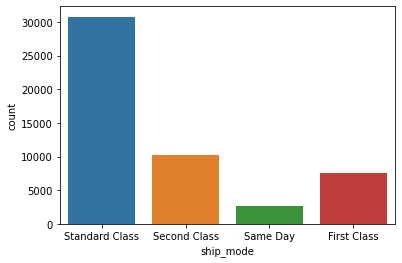

<Figure size 1440x1080 with 0 Axes>

In [10]:
#ship_mode_df = df.ship_mode.value_counts().to_frame('count')
#ship_mode_df
sns.countplot(data=df, x='ship_mode')
plt.figure(figsize = (20,15))
plt.show()

5. Which are the Most Profitable Category, Sub-Category and product?

***Here, we see that technology products bring in the most profit to the store, especially smartphones and copiers as earlier established, next would be office supplies (appliances and Storage), lastly furnitures (bookcases and chairs)
Furnitures like 'Tables' tend to bring in some losses. The store could stop the sales of furnitures.***

In [11]:
profit_df = pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])

profit_df.sort_values(['category','profit'], ascending = False)


profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870


6. Who are the customers that attracts the most profit?

***Here is a list of first 10 customers that bring in the most profit into the company, for bringing in more profit into the company, they could be given gift cards or vouchers when required ***

In [12]:
cust_profit_df = df.groupby('customer_name')[['profit','sales']].sum().sort_values(by='profit',ascending=False).head(10)
cust_profit_df

,profit,sales
customer_name,,
Tamara Chand,8672.89890,37457.34
Raymond Buch,8453.04950,29602.16
Sanjit Chand,8205.37990,26521.13
Hunter Lopez,7816.56778,30243.60
Bill Eplett,7410.00530,28479.17
Harry Marie,6958.28640,28476.95
Susan Pistek,6484.40726,29020.60
Mike Gockenbach,6458.67620,23377.06
Adrian Barton,6417.28450,25123.19


In [13]:
df[df['profit']== 8399.975999999999]
df[df['customer_name']== 'Tamara Chand'].head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month,weekday
2019,IN-2011-28654,2011-06-05,10.05.11,Standard Class,Tamara Chand,Corporate,Sichuan,China,APAC,North Asia,...,"Brother Wireless Fax, High-Speed",1131.03,3,0.0,327.96,76.57,High,2011,6,6
2022,IN-2011-28654,2011-06-05,10.05.11,Standard Class,Tamara Chand,Corporate,Sichuan,China,APAC,North Asia,...,"Dania 3-Shelf Cabinet, Traditional",424.35,3,0.0,25.38,53.34,High,2011,6,6
2032,IN-2011-28654,2011-06-05,10.05.11,Standard Class,Tamara Chand,Corporate,Sichuan,China,APAC,North Asia,...,"Eldon Stacking Tray, Black",252.00,8,0.0,108.24,11.19,High,2011,6,6
2734,AJ-2011-4420,2011-08-06,08.06.11,Same Day,Tamara Chand,Corporate,Baki,Azerbaijan,EMEA,EMEA,...,"Hon Executive Leather Armchair, Adjustable",454.71,1,0.0,50.01,147.24,Critical,2011,8,5
2739,AJ-2011-4420,2011-08-06,08.06.11,Same Day,Tamara Chand,Corporate,Baki,Azerbaijan,EMEA,EMEA,...,"Logitech Numeric Keypad, Programmable",95.64,2,0.0,12.42,23.75,Critical,2011,8,5


7. What item was mostly sold in each year?

***Again, smartphones were the most sold in each year, especially Apple, Nokia, Cisco and Motorola brands***

In [14]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month', 'weekday'],
      dtype='object')

In [39]:
year1 = df[df['year']== 2011]
year2 = df[df['year']== 2012]
year3 = df[df['year']== 2013]
year4 = df[df['year']== 2014]

#def create_yearly_sales(df):
    #sales_df = df.groupby('product_name')[['sales']].sum().sort_values(by='sales', ascending=False).head()
    
    



sales_2011 = year1.groupby('product_name')[['sales']].sum().sort_values(by='sales', ascending=False).head(10)
sales_2012 = year2.groupby('product_name')[['sales']].sum().sort_values(by='sales', ascending=False).head(10)
sales_2013 = year3.groupby('product_name')[['sales']].sum().sort_values(by='sales', ascending=False).head(10)
sales_2014 = year4.groupby('product_name')[['sales']].sum().sort_values(by='sales', ascending=False).head(10)



print('****************')
print('****************')
print('IN 2011')
print(sales_2011)

print('****************')
print('****************')
print('IN 2012')
print(sales_2012)

print('****************')
print('****************')
print('IN 2013')
print(sales_2013)

print('****************')
print('****************')
print('IN 2014')
print(sales_2014)






****************
****************
IN 2011
                                                       sales
product_name                                                
Cisco TelePresence System EX90 Videoconferencin...  22638.48
Samsung Smart Phone, VoIP                           16330.16
Nokia Smart Phone, Full Size                        16265.52
Cisco Smart Phone, with Caller ID                   15614.53
Apple Smart Phone, Full Size                        14986.25
Samsung Smart Phone, Cordless                       14300.82
Nokia Smart Phone, Cordless                         13677.23
SAFCO Executive Leather Armchair, Black             12530.70
Lexmark MX611dhe Monochrome Laser Printer           11219.93
Novimex Executive Leather Armchair, Black           10774.04
****************
****************
IN 2012
                                                       sales
product_name                                                
Nokia Smart Phone, Full Size                        21099.53
A

8. What day of the week did most people make orders?

***Here, we see that most orders were made during the week starting from Monday(0) till Sunday(6)***

<AxesSubplot:xlabel='weekday', ylabel='count'>

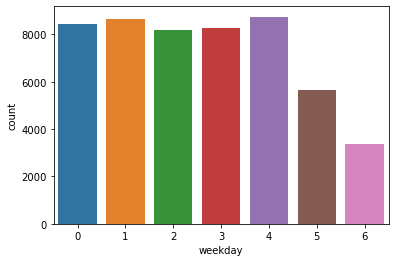

In [16]:
sns.countplot(data=df,x='weekday')

9. Is there a trend in purchase per month?

***There seems to be a significant trend in their purchases per month. More purchases were made towards the end of the month. This could be due to the festive period (November(11) and December(12)) where people buy gifts for their loved ones. I reckon that this is usually the peak period of this store***


<AxesSubplot:xlabel='month'>

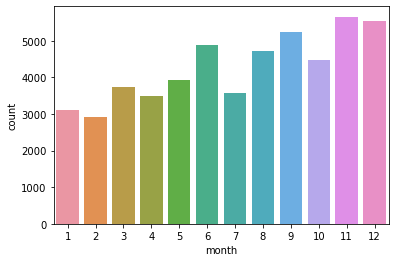

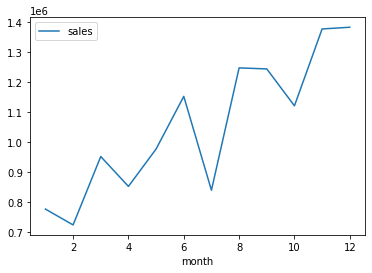

In [17]:
sns.countplot(data=df,x='month')
sales_month= pd.DataFrame(df.groupby('month')[[('sales')]].sum())
sales_month.plot.line()

Save cleaned CSV to file

In [18]:
df_new = df.copy()
df_new.to_csv('superstore_sales_cleaned.csv', index=False)


10. What country do most customers come from ?

In [47]:

country_df = df.groupby('country')[['sales']].count().sort_values(by='sales', ascending = False)
country_df.head()

,sales
country,
United States,9994
Australia,2837
France,2827
Mexico,2644
Germany,2065
